![](https://www.pata.org/wp-content/uploads/2014/09/TripAdvisor_Logo-300x119.png)
# Predict TripAdvisor Rating
## В этом соревновании нам предстоит предсказать рейтинг ресторана в TripAdvisor
**По ходу задачи:**
* Прокачаем работу с pandas
* Научимся работать с Kaggle Notebooks
* Поймем как делать предобработку различных данных
* Научимся работать с пропущенными данными (Nan)
* Познакомимся с различными видами кодирования признаков
* Немного попробуем [Feature Engineering](https://ru.wikipedia.org/wiki/Конструирование_признаков) (генерировать новые признаки)
* И совсем немного затронем ML
* И многое другое...   



### И самое важное, все это вы сможете сделать самостоятельно!

*Этот Ноутбук являетсся Примером/Шаблоном к этому соревнованию (Baseline) и не служит готовым решением!*   
Вы можете использовать его как основу для построения своего решения.

> что такое baseline решение, зачем оно нужно и почему предоставлять baseline к соревнованию стало важным стандартом на kaggle и других площадках.   
**baseline** создается больше как шаблон, где можно посмотреть как происходит обращение с входящими данными и что нужно получить на выходе. При этом МЛ начинка может быть достаточно простой, просто для примера. Это помогает быстрее приступить к самому МЛ, а не тратить ценное время на чисто инженерные задачи. 
Также baseline являеться хорошей опорной точкой по метрике. Если твое решение хуже baseline - ты явно делаешь что-то не то и стоит попробовать другой путь) 

В контексте нашего соревнования baseline идет с небольшими примерами того, что можно делать с данными, и с инструкцией, что делать дальше, чтобы улучшить результат.  Вообще готовым решением это сложно назвать, так как используются всего 2 самых простых признака (а остальные исключаются).

# import

In [247]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load in 

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

from ast import literal_eval
from itertools import chain
import collections
import re

import matplotlib.pyplot as plt
import seaborn as sns 
%matplotlib inline
import seaborn as sns
from itertools import combinations
from scipy.stats import ttest_ind

# Загружаем специальный удобный инструмент для разделения датасета:
from sklearn.model_selection import train_test_split

# Input data files are available in the "../input/" directory.
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

#import os
#for dirname, _, filenames in os.walk('/kaggle/input'):
#    for filename in filenames:
#        print(os.path.join(dirname, filename))

# Any results you write to the current directory are saved as output.

In [248]:
# всегда фиксируйте RANDOM_SEED, чтобы ваши эксперименты были воспроизводимы!
RANDOM_SEED = 42

In [249]:
# зафиксируем версию пакетов, чтобы эксперименты были воспроизводимы:
!pip freeze > requirements.txt

# DATA

In [250]:
#DATA_DIR = '/kaggle/input/sf-dst-restaurant-rating/'
#df_train = pd.read_csv('/main_task.csv')
#df_test = pd.read_csv(DATA_DIR+'kaggle_task.csv')
#sample_submission = pd.read_csv(DATA_DIR+'/sample_submission.csv')
df_train = pd.read_csv('main_task.csv')
df_test = pd.read_csv('kaggle_task.csv')
sample_submission = pd.read_csv('sample_submission.csv')

In [251]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 40000 entries, 0 to 39999
Data columns (total 10 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Restaurant_id      40000 non-null  object 
 1   City               40000 non-null  object 
 2   Cuisine Style      30717 non-null  object 
 3   Ranking            40000 non-null  float64
 4   Rating             40000 non-null  float64
 5   Price Range        26114 non-null  object 
 6   Number of Reviews  37457 non-null  float64
 7   Reviews            40000 non-null  object 
 8   URL_TA             40000 non-null  object 
 9   ID_TA              40000 non-null  object 
dtypes: float64(3), object(7)
memory usage: 3.1+ MB


In [252]:
df_train.head(5)

,Restaurant_id,City,Cuisine Style,Ranking,Rating,Price Range,Number of Reviews,Reviews,URL_TA,ID_TA
0,id_5569,Paris,"['European', 'French', 'International']",5570.0,3.5,$$ - $$$,194.0,"[['Good food at your doorstep', 'A good hotel ...",/Restaurant_Review-g187147-d1912643-Reviews-R_...,d1912643
1,id_1535,Stockholm,NaN,1537.0,4.0,NaN,10.0,"[['Unique cuisine', 'Delicious Nepalese food']...",/Restaurant_Review-g189852-d7992032-Reviews-Bu...,d7992032
2,id_352,London,"['Japanese', 'Sushi', 'Asian', 'Grill', 'Veget...",353.0,4.5,$$$$,688.0,"[['Catch up with friends', 'Not exceptional'],...",/Restaurant_Review-g186338-d8632781-Reviews-RO...,d8632781
3,id_3456,Berlin,NaN,3458.0,5.0,NaN,3.0,"[[], []]",/Restaurant_Review-g187323-d1358776-Reviews-Es...,d1358776
4,id_615,Munich,"['German', 'Central European', 'Vegetarian Fri...",621.0,4.0,$$ - $$$,84.0,"[['Best place to try a Bavarian food', 'Nice b...",/Restaurant_Review-g187309-d6864963-Reviews-Au...,d6864963


In [253]:
df_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 9 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Restaurant_id      10000 non-null  object 
 1   City               10000 non-null  object 
 2   Cuisine Style      7693 non-null   object 
 3   Ranking            10000 non-null  float64
 4   Price Range        6525 non-null   object 
 5   Number of Reviews  9343 non-null   float64
 6   Reviews            9998 non-null   object 
 7   URL_TA             10000 non-null  object 
 8   ID_TA              10000 non-null  object 
dtypes: float64(2), object(7)
memory usage: 703.2+ KB


In [254]:
df_test.head(5)

,Restaurant_id,City,Cuisine Style,Ranking,Price Range,Number of Reviews,Reviews,URL_TA,ID_TA
0,id_0,Paris,"['Bar', 'Pub']",12963.0,$$ - $$$,4.0,"[[], []]",/Restaurant_Review-g187147-d10746918-Reviews-L...,d10746918
1,id_1,Helsinki,"['European', 'Scandinavian', 'Gluten Free Opti...",106.0,$$ - $$$,97.0,"[['Very good reviews!', 'Fine dining in Hakani...",/Restaurant_Review-g189934-d6674944-Reviews-Ra...,d6674944
2,id_2,Edinburgh,['Vegetarian Friendly'],810.0,$$ - $$$,28.0,"[['Better than the Links', 'Ivy Black'], ['12/...",/Restaurant_Review-g186525-d13129638-Reviews-B...,d13129638
3,id_3,London,"['Italian', 'Mediterranean', 'European', 'Vege...",1669.0,$$$$,202.0,"[['Most exquisite', 'Delicious and authentic']...",/Restaurant_Review-g186338-d680417-Reviews-Qui...,d680417
4,id_4,Bratislava,"['Italian', 'Mediterranean', 'European', 'Seaf...",37.0,$$$$,162.0,"[['Always the best in bratislava', 'Very good ...",/Restaurant_Review-g274924-d1112354-Reviews-Ma...,d1112354


In [255]:
sample_submission.head(5)

,Restaurant_id,Rating
0,id_0,2.0
1,id_1,2.5
2,id_2,4.0
3,id_3,1.0
4,id_4,4.0


In [256]:
sample_submission.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 2 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Restaurant_id  10000 non-null  object 
 1   Rating         10000 non-null  float64
dtypes: float64(1), object(1)
memory usage: 156.4+ KB


In [257]:
# ВАЖНО! дря корректной обработки признаков объединяем трейн и тест в один датасет
df_train['sample'] = 1 # помечаем где у нас трейн
df_test['sample'] = 0 # помечаем где у нас тест
df_test['Rating'] = 0 # в тесте у нас нет значения Rating, мы его должны предсказать, по этому пока просто заполняем нулями

data = df_test.append(df_train, sort=False).reset_index(drop=True) # объединяем

In [258]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 11 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Restaurant_id      50000 non-null  object 
 1   City               50000 non-null  object 
 2   Cuisine Style      38410 non-null  object 
 3   Ranking            50000 non-null  float64
 4   Price Range        32639 non-null  object 
 5   Number of Reviews  46800 non-null  float64
 6   Reviews            49998 non-null  object 
 7   URL_TA             50000 non-null  object 
 8   ID_TA              50000 non-null  object 
 9   sample             50000 non-null  int64  
 10  Rating             50000 non-null  float64
dtypes: float64(3), int64(1), object(7)
memory usage: 4.2+ MB


Подробнее по признакам:
* City: Город 
* Cuisine Style: Кухня
* Ranking: Ранг ресторана относительно других ресторанов в этом городе
* Price Range: Цены в ресторане в 3 категориях
* Number of Reviews: Количество отзывов
* Reviews: 2 последних отзыва и даты этих отзывов
* URL_TA: страница ресторана на 'www.tripadvisor.com' 
* ID_TA: ID ресторана в TripAdvisor
* Rating: Рейтинг ресторана

In [259]:
data.sample(5)

,Restaurant_id,City,Cuisine Style,Ranking,Price Range,Number of Reviews,Reviews,URL_TA,ID_TA,sample,Rating
615,id_615,Lyon,NaN,132.0,NaN,47.0,"[['Fantastic'], ['05/27/2017']]",/Restaurant_Review-g187265-d12398846-Reviews-S...,d12398846,0,0.0
2490,id_2490,Madrid,['American'],8404.0,$$ - $$$,35.0,"[['Smoking', 'Excellent'], ['12/27/2017', '01/...",/Restaurant_Review-g187514-d5794920-Reviews-Fo...,d5794920,0,0.0
21782,id_7128,Madrid,NaN,7132.0,NaN,8.0,"[['Flawless'], ['10/24/2015']]",/Restaurant_Review-g187514-d8073370-Reviews-Pi...,d8073370,1,3.5
37867,id_6637,Madrid,NaN,6640.0,NaN,2.0,"[[], []]",/Restaurant_Review-g187514-d10044221-Reviews-O...,d10044221,1,3.5
24787,id_5001,Milan,NaN,5004.0,NaN,5.0,"[[], []]",/Restaurant_Review-g187849-d8088040-Reviews-Ch...,d8088040,1,3.5


In [260]:
data.Reviews[1]

"[['Very good reviews!', 'Fine dining in Hakaniemi'], ['12/05/2017', '10/29/2017']]"

Как видим, большинство признаков у нас требует очистки и предварительной обработки.

# Cleaning and Prepping Data
Обычно данные содержат в себе кучу мусора, который необходимо почистить, для того чтобы привести их в приемлемый формат. Чистка данных — это необходимый этап решения почти любой реальной задачи.  

In [261]:
# Проверка названий столбцов
data.columns

Index(['Restaurant_id', 'City', 'Cuisine Style', 'Ranking', 'Price Range',
       'Number of Reviews', 'Reviews', 'URL_TA', 'ID_TA', 'sample', 'Rating'],
      dtype='object')

In [262]:
# Проверка количества пропущенных значений
data.isna().sum()

Restaurant_id            0
City                     0
Cuisine Style        11590
Ranking                  0
Price Range          17361
Number of Reviews     3200
Reviews                  2
URL_TA                   0
ID_TA                    0
sample                   0
Rating                   0
dtype: int64

## 1. Обработка NAN 
У наличия пропусков могут быть разные причины, но пропуски нужно либо заполнить, либо исключить из набора полностью. Но с пропусками нужно быть внимательным, **даже отсутствие информации может быть важным признаком!**   
По этому перед обработкой NAN лучше вынести информацию о наличии пропуска как отдельный признак 

### 1.1 Обработка NAN Cuisine Style

In [263]:
# Сохранение информации о 11590 пропущенных значениях в столбце Cuisine Style
data['Cuisine Style_isNAN'] = pd.isna(data['Cuisine Style']).astype('uint8')

In [264]:
# Заполнение пропущенных значений 'Unknown Cuisine'
data['Cuisine Style'].fillna("['Unknown Cuisine']",inplace=True)

### 1.2 Обработка NAN Price Range

In [265]:
# Сохранение информации о 17361 пропупущенном значении в столбце Price Range
data['Price Range_isNAN'] = pd.isna(data['Price Range']).astype('uint8')

In [266]:
# Подсчет количества ресторанов в зависимости от диапазона цен
data['Price Range'].value_counts(dropna=False)

$$ - $$$    23041
NaN         17361
$            7816
$$$$         1782
Name: Price Range, dtype: int64

In [267]:
# Заполнение пропущенных значений  модой - "$$-$$$"
data['Price Range'].fillna('$$ - $$$',inplace=True)
data['Price Range'].value_counts(dropna = False)
data['Price Range'].head(5)

0    $$ - $$$
1    $$ - $$$
2    $$ - $$$
3        $$$$
4        $$$$
Name: Price Range, dtype: object

### 1.3 Обработка NAN Number of Reviews

In [268]:
# Сохранение информации о 3200 пропупущенных значениях в столбце Number of Reviews
data['Number of Reviews_isNAN'] = pd.isna(data['Number of Reviews']).astype('uint8')

In [269]:
# Заполнение пропущенных значений средним арифметическим
data['Number of Reviews'].fillna(data['Number of Reviews'].mean(),inplace=True)

### 1.4 Обработка NAN Reviews

In [270]:
# Сохранение информации о 2 пропущенных значениях в столбце Reviews
data['Reviews_isNAN'] = pd.isna(data['Reviews']).astype('uint8')

In [271]:
# Обзор пропущенных значений
data[data['Reviews'].isna()]

,Restaurant_id,City,Cuisine Style,Ranking,Price Range,Number of Reviews,Reviews,URL_TA,ID_TA,sample,Rating,Cuisine Style_isNAN,Price Range_isNAN,Number of Reviews_isNAN,Reviews_isNAN
8168,id_8168,Lisbon,['Unknown Cuisine'],3389.0,$$ - $$$,2.000000,NaN,/Restaurant_Review-g189158-d12683988-Reviews-O...,d12683988,0,0.0,1,1,0,1
9608,id_9608,Vienna,['Unknown Cuisine'],1779.0,$$ - $$$,124.471197,NaN,/Restaurant_Review-g190454-d12605368-Reviews-R...,d12605368,0,0.0,1,1,1,1


In [272]:
# Заполнение пропущенных значений любым
data['Reviews'].fillna(data['Reviews'].any(),inplace=True)

In [273]:
# Обзор результата замены
data['Reviews'][9608]

'[[], []]'

In [274]:
# Проверка отсутствия пропусков
data.isna().sum()

Restaurant_id              0
City                       0
Cuisine Style              0
Ranking                    0
Price Range                0
Number of Reviews          0
Reviews                    0
URL_TA                     0
ID_TA                      0
sample                     0
Rating                     0
Cuisine Style_isNAN        0
Price Range_isNAN          0
Number of Reviews_isNAN    0
Reviews_isNAN              0
dtype: int64

## 2. Обработка признаков
### Для начала посмотрим какие признаки у нас могут быть категориальными.

In [275]:
data.nunique(dropna=False)

Restaurant_id              13094
City                          31
Cuisine Style              10732
Ranking                    12975
Price Range                    3
Number of Reviews           1574
Reviews                    41857
URL_TA                     49963
ID_TA                      49963
sample                         2
Rating                        10
Cuisine Style_isNAN            2
Price Range_isNAN              2
Number of Reviews_isNAN        2
Reviews_isNAN                  2
dtype: int64

### Какие признаки можно считать категориальными?

Для кодирования категориальных признаков есть множество подходов:
* Label Encoding
* One-Hot Encoding
* Target Encoding
* Hashing

### Выбор кодирования зависит от признака и выбраной модели.

### Для One-Hot Encoding в pandas есть готовая функция - get_dummies с параметром dummy_na

### Возьмем следующий признак "Price Range".

По описанию 'Price Range' это - Цены в ресторане.  
Их можно поставить по возрастанию (значит это не категориальный признак). А это значит, что их можно заменить последовательными числами, например 1,2,3  
*Попробуйте сделать обработку этого признака уже самостоятельно!*

In [276]:
# Конвертация диапазона цен в ресторанах
def conv_price(x):
    d = {
        '$$ - $$$':2,
        '$': 1,
        '$$$$':3
    }
    if x in d.keys():
        return d[x]
    elif pd.isnull(x):
        return float('NaN')
    else:
        return float('NaN')

In [277]:
# Конвертация диапазона цен в цифры, где '$'=1,'$$'-'$$$'=2,'$$$$' =3
data['Price Range'] =  data['Price Range'].apply(conv_price)
data['Price Range'].head(5)

0    2
1    2
2    2
3    3
4    3
Name: Price Range, dtype: int64

> Для некоторых алгоритмов МЛ даже для не категориальных признаков можно применить One-Hot Encoding, и это может улучшить качество модели. Пробуйте разные подходы к кодированию признака - никто не знает заранее, что может взлететь.

### Обработать другие признаки вы должны самостоятельно!
Для обработки других признаков вам возможно придется даже написать свою функцию, а может даже и не одну, но в этом и есть ваша практика в этом модуле!     
Следуя подсказкам в модуле вы сможете более подробно узнать, как сделать эти приобразования.

In [278]:
# тут ваш код на обработку других признаков
# .....

## Для удобства работу по данному разделу сделаю в Data Preprocessing по результатам EDA 

## 3.EDA 
[Exploratory Data Analysis](https://ru.wikipedia.org/wiki/Разведочный_анализ_данных) - Анализ данных
На этом этапе мы строим графики, ищем закономерности, аномалии, выбросы или связи между признаками.
В общем цель этого этапа понять, что эти данные могут нам дать и как признаки могут быть взаимосвязаны между собой.
Понимание изначальных признаков позволит сгенерировать новые, более сильные и, тем самым, сделать нашу модель лучше.

### 3.1 Посмотрим признак Restaurant_id

11909


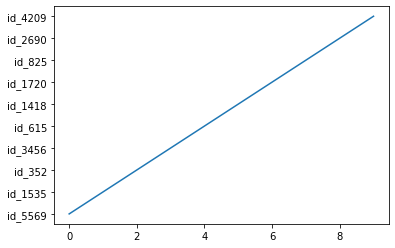

In [279]:
print(df_train['Restaurant_id'].nunique())
plt.plot(df_train['Restaurant_id'][:10])

Количество уникальных значений id меньше количества строк. Мы можем предположить, что некоторые рестораны являются сетевыми, и создать новый категориальный признак

### 3.2 Посмотрим признак City

31


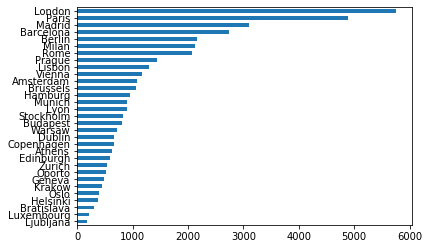

In [280]:
print(df_train['City'].nunique())
df_train['City'].value_counts(ascending=True).plot(kind='barh')

Имеется 31 уникальный город. В ТОП-3 городов по ресторанам входят Лондон,Париж и Мадрид. Мы можем рассмотреть создание новых категориальных признаков в различных интерпретациях: население города, количество ресторанов в каждом городе, отношение количества ресторанов на количество населения города. 

### 3.3 Посмотрим признак Сuisine Style

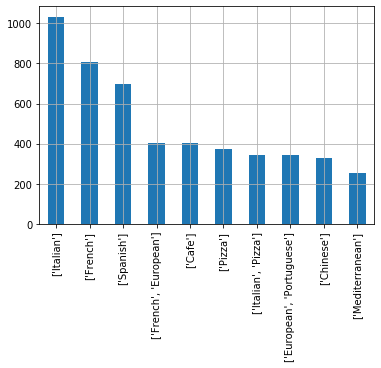

In [281]:
df_train['Cuisine Style'].value_counts()[:10].plot(kind='bar',grid=True)

Видим, что признаку требуется обработка, так как в ресторане могут быть представлены несколько видов кухонь. Мы можем рассмотреть создание таких новых признаков как среднее количество кухонь в одном ресторане и dummy.

### 3.4 Посмотрим признак Ranking

count    40000.000000
mean      3676.028525
std       3708.749567
min          1.000000
25%        973.000000
50%       2285.000000
75%       5260.000000
max      16444.000000
Name: Ranking, dtype: float64

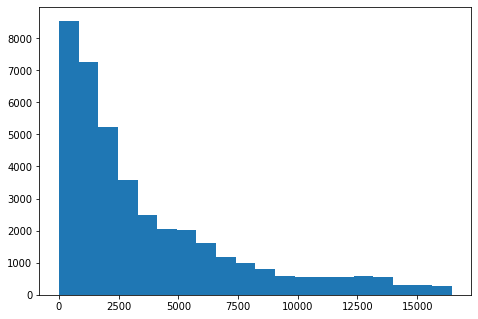

In [282]:
# Признак числовой и без пропусков, смотрим его распределение
fig = plt.figure()
axes = fig.add_axes([0,0,1,1])
axes.hist(df_train['Ranking'],bins=20)
df_train['Ranking'].describe()

У нас много ресторанов, которые не дотягивают и до 2500 места в своем городе.

count     5757.000000
mean      8198.461873
std       4734.698715
min          1.000000
25%       4137.000000
50%       8129.000000
75%      12321.000000
max      16444.000000
Name: Ranking, dtype: float64

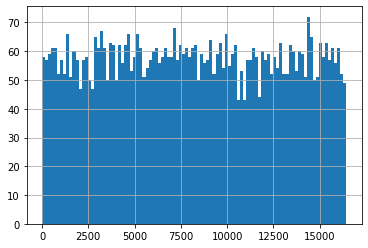

In [283]:
# Посмотрим, как изменится распределение в большом городе:
df_train['Ranking'][df_train['City'] =='London'].hist(bins=100)
df_train['Ranking'][df_train['City'] =='London'].describe()

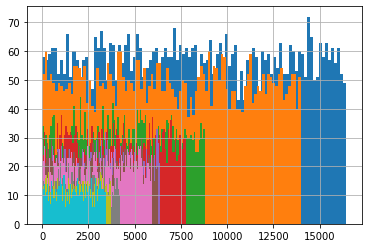

In [284]:
# Посмотрим на топ 10 городов
for x in (df_train['City'].value_counts())[0:10].index:
    df_train['Ranking'][df_train['City'] == x].hist(bins=100)
plt.show()

Получается, что Ranking имеет нормальное распределение, просто в больших городах больше ресторанов, из-за мы этого имеем смещение. Мы можем рассмотреть создание нового признака - относительный рейтинг ресторанов, чтобы избавиться от смещения.

### 3.5 Посмотрим признак Price Range

In [285]:
# Подсчет количества ресторанов в зависимости от диапазона цен
df_train['Price Range'].value_counts(dropna = False) 

$$ - $$$    18412
NaN         13886
$            6279
$$$$         1423
Name: Price Range, dtype: int64

Наиболее часто встречаются цены в диапазоне `$$ - $$$`. Мы можем рассмотреть создание нового dummy признака.

### 3.6 Посмотрим признак Number of Reviews	

count    37457.000000
mean       124.825480
std        295.666352
min          2.000000
25%          9.000000
50%         33.000000
75%        115.000000
max       9660.000000
Name: Number of Reviews, dtype: float64

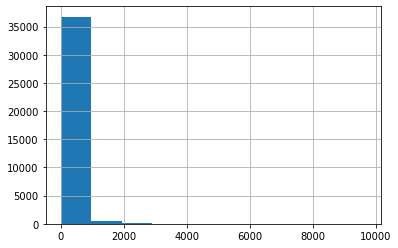

In [286]:
# Признак числовой c пропусками, смотрим его распределение
df_train['Number of Reviews'].hist()
df_train['Number of Reviews'].describe()

count    5408.000000
mean      137.969490
std       332.614434
min         2.000000
25%         9.000000
50%        38.000000
75%       132.250000
max      9660.000000
Name: Number of Reviews, dtype: float64

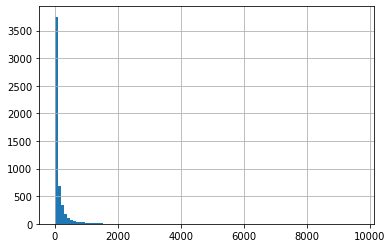

In [287]:
# Посмотрим, как изменится распределение в большом городе:
df_train['Number of Reviews'][df_train['City'] =='London'].hist(bins=100)
df_train['Number of Reviews'][df_train['City'] =='London'].describe()

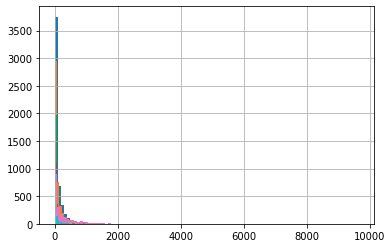

In [288]:
# Посмотрим на топ 10 городов
for x in (df_train['City'].value_counts())[0:10].index:
    df_train['Number of Reviews'][df_train['City'] == x].hist(bins=100)
plt.show()

Проверим выбросы.

25-й перцентиль: 9.0, 75-й перцентиль: 115.0, IQR: 106.0,  Границы выбросов: [-150.0, 274.0].


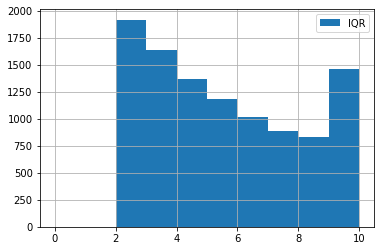

In [289]:
IQR = df_train['Number of Reviews'].quantile(0.75) - df_train['Number of Reviews'].quantile(0.25)
perc25 = df_train['Number of Reviews'].quantile(0.25)
perc75 = df_train['Number of Reviews'].quantile(0.75)
print('25-й перцентиль: {},'.format(perc25), '75-й перцентиль: {},'.format(perc75),"IQR: {}, ".format(IQR),\
      "Границы выбросов: [{f}, {l}].".format(f=perc25 - 1.5*IQR, l=perc75 + 1.5*IQR))
 
df_train['Number of Reviews'].loc[df_train['Number of Reviews'].between(perc25 - 1.5*IQR, perc75 + 1.5*IQR)].\
hist(bins = 10, range = (0, 10), label = 'IQR')
 
plt.legend()

Либо имеет место накрутка отзывов, либо некоторые рестораны действительно хорошие. Целесообразно создать новый признак - среднее количество отзывов на город.

### 3.7 Посмотрим признак  Reviews

In [290]:
df_train['Reviews'][1]

"[['Unique cuisine', 'Delicious Nepalese food'], ['07/06/2017', '06/19/2016']]"

Можно получить информацию о разнице между датами отзывов;времени,прошедшем с последнего отзыва;попробовать проанализировать тональность отзывов (положительный или отрицательный)

### 3.8 Посмотрим признак  URL_TA

In [291]:
df_train['URL_TA'][:5] 

0    /Restaurant_Review-g187147-d1912643-Reviews-R_...
1    /Restaurant_Review-g189852-d7992032-Reviews-Bu...
2    /Restaurant_Review-g186338-d8632781-Reviews-RO...
3    /Restaurant_Review-g187323-d1358776-Reviews-Es...
4    /Restaurant_Review-g187309-d6864963-Reviews-Au...
Name: URL_TA, dtype: object

Можем предположить, что признак связан с очередностью появления на сайте ресторана и взять числовую часть, а также получить информацию о координатах ресторанов и оценить их расположение относительно центра города, в котором они находятся 

### 3.9 Посмотрим признак  ID_TA

In [292]:
df_train['ID_TA'][:5] 

0    d1912643
1    d7992032
2    d8632781
3    d1358776
4    d6864963
Name: ID_TA, dtype: object

Видим, что ID присутствует в URL, также можем взять числовую часть, после анализа их корреляции.

### 3.10 Посмотрим распределение целевой переменной Rating

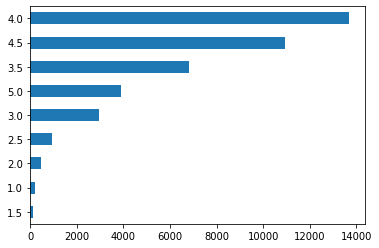

In [293]:
df_train['Rating'].value_counts(ascending=True).plot(kind='barh')

### Посмотрим распределение целевой переменной относительно Ranking

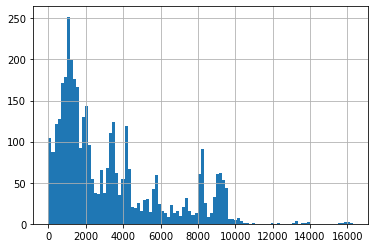

In [294]:
df_train['Ranking'][df_train['Rating'] == 5].hist(bins=100)

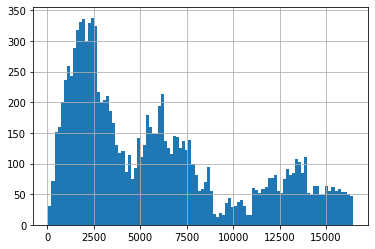

In [295]:
df_train['Ranking'][df_train['Rating'] < 4].hist(bins=100)

### 3.10 Посмотрим корреляцию признаков

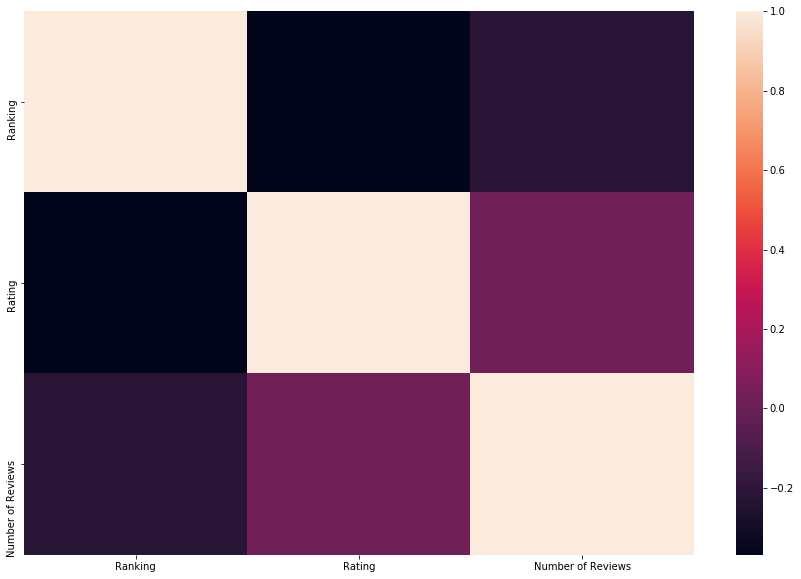

In [296]:
plt.rcParams['figure.figsize'] = (15,10)
sns.heatmap(df_train.drop(['sample'], axis=1).corr(),)

In [297]:
df_train.corr()

,Ranking,Rating,Number of Reviews,sample
Ranking,1.000000,-0.368371,-0.222670,NaN
Rating,-0.368371,1.000000,0.030964,NaN
Number of Reviews,-0.222670,0.030964,1.000000,NaN
sample,NaN,NaN,NaN,NaN


Корреляция между признаками выражена слабо, все признаки оставляем для дальнейшей обработки

### 3.11 Посмотрим номинативные признаки

Очевидно, что для номинативных признаков использовать корреляционный анализ не получится. Однако можно посмотреть, различаются ли распределения рейтинга в зависимости от значения этих признаков. Это можно сделать, например, с помощью box-plot или KDE-plot (график показывает плотность распределения переменных).

Номинативные признаки, которые осталось рассмотреть: Restaurant_id, City, Cuisine Style, Price Range, Reviews, URL_TA, ID_TA

Так как уникальных значений в столбцах достаточно много, будем брать в рассмотрение по 30 самых частотных.

In [298]:
def get_boxplot(column):
    fig, ax = plt.subplots(figsize = (14, 4))
    sns.boxplot(x=column, y='Rating', 
                data=df_train.loc[df_train.loc[:, column].isin(df_train.loc[:, column].value_counts().index[:30])],
               ax=ax)
    plt.xticks(rotation=45)
    ax.set_title('Boxplot for ' + column)
    plt.show()

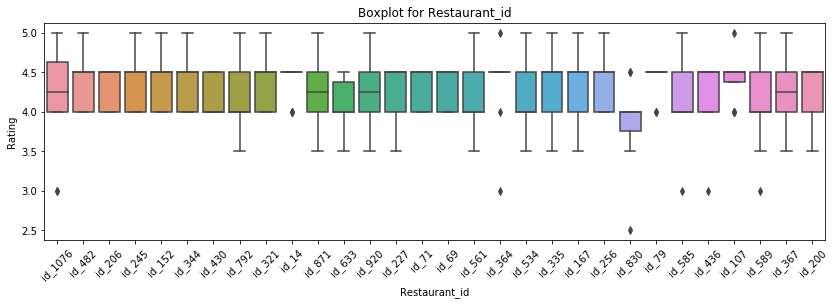

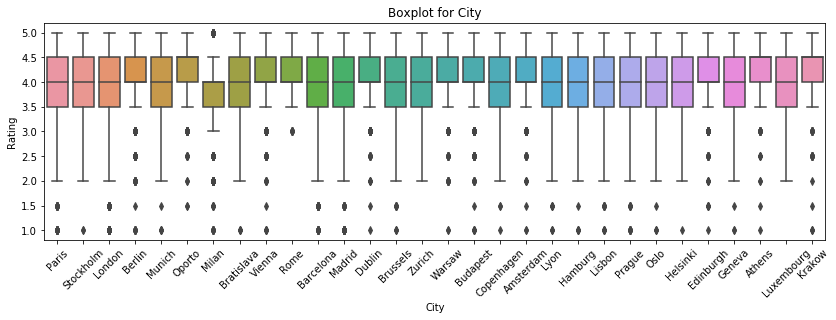

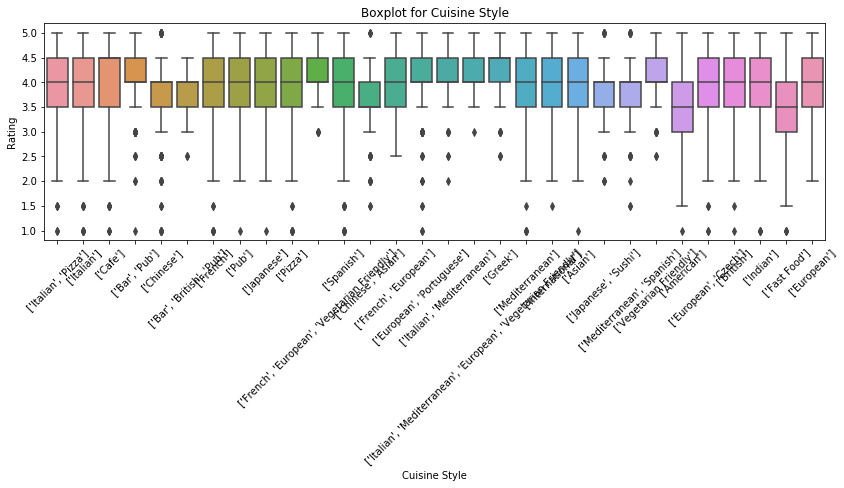

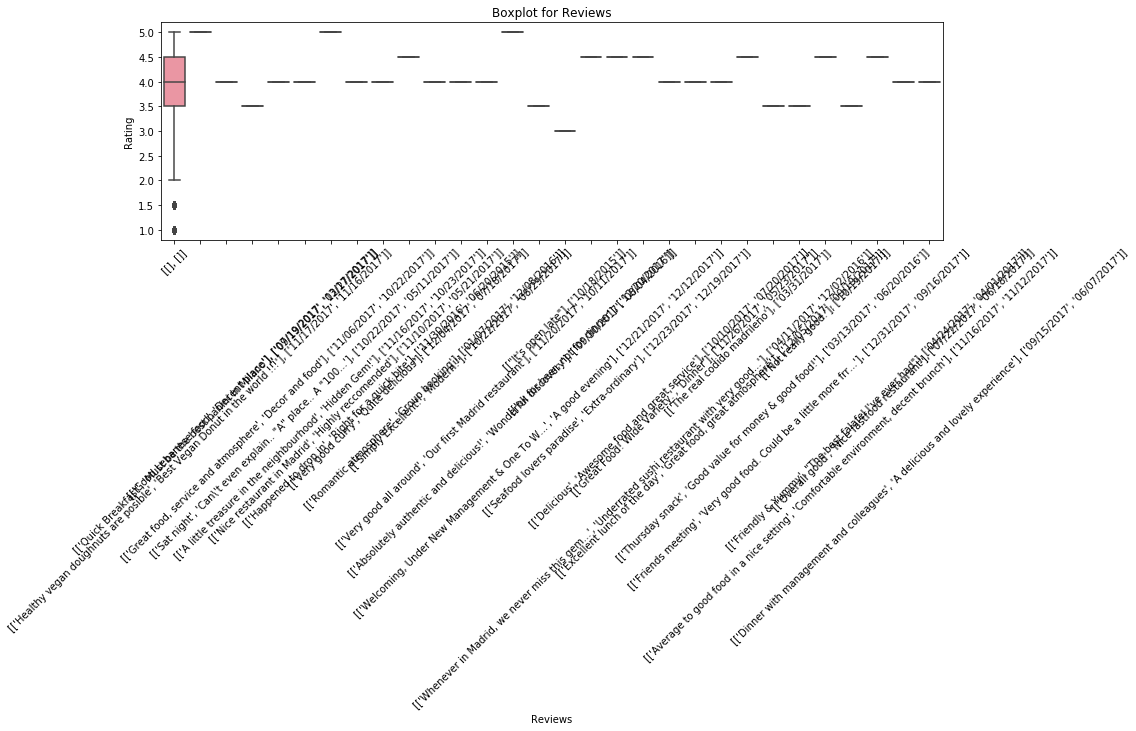

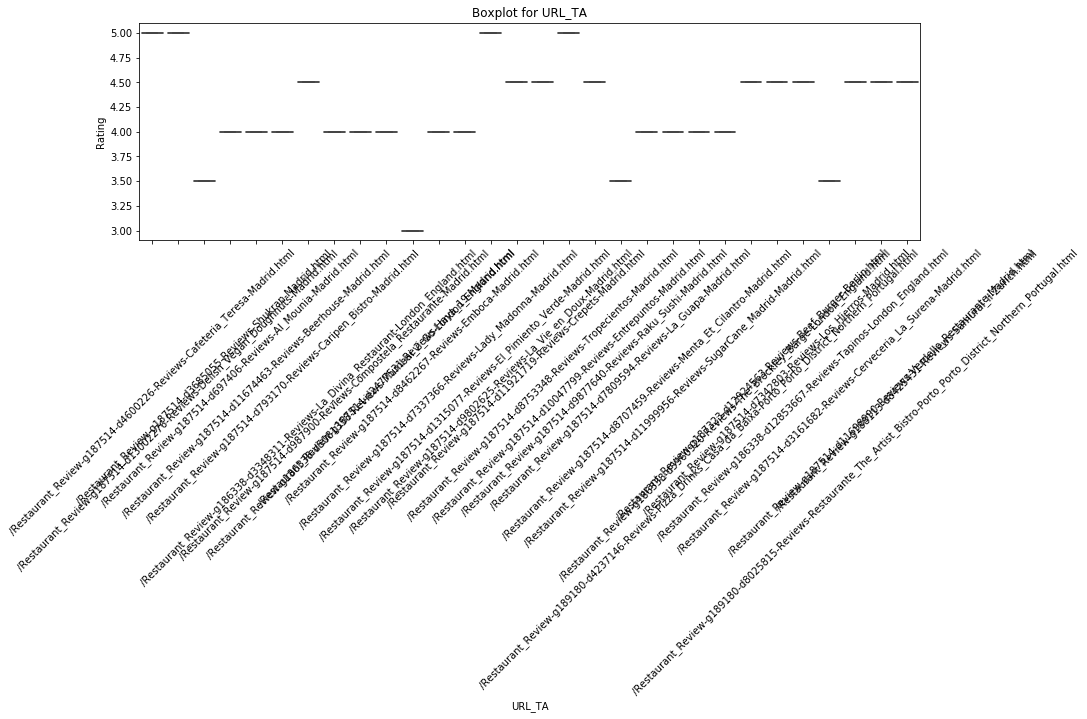

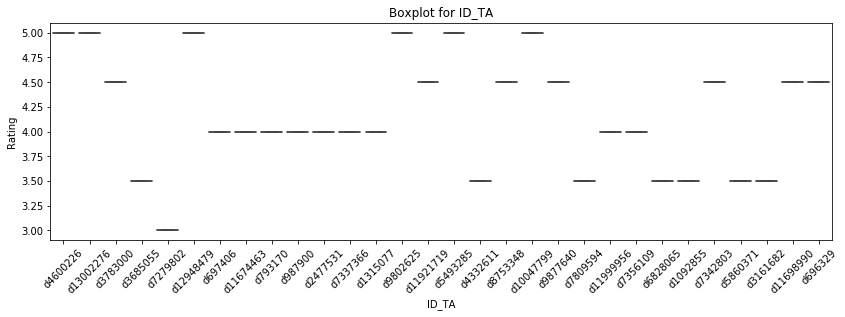

In [299]:
for col in ['Restaurant_id', 'City', 'Cuisine Style', 'Reviews', 'URL_TA', 'ID_TA']:
    get_boxplot(col)

По графикам похоже, что все признаки могут влиять на оценку. Проверим, есть ли статистическая разница в распределении оценок по номинативным признакам, с помощью теста Стьюдента. Проверим нулевую гипотезу о том, что распределения оценок по различным признакам неразличимы:

In [300]:
def get_stat_dif(column):
    cols = df_train.loc[:, column].value_counts().index[:30]
    combinations_all = list(combinations(cols, 2))
    for comb in combinations_all:
        if ttest_ind(df_train.loc[df_train.loc[:, column] == comb[0], 'Rating'], 
                        df_train.loc[df_train.loc[:, column] == comb[1], 'Rating']).pvalue \
            <= 0.05/len(combinations_all): # Учли поправку Бонферони
            print('Найдены статистически значимые различия для колонки', column)
            break

In [301]:
for col in ['Restaurant_id', 'City', 'Cuisine Style', 'Reviews', 'URL_TA', 'ID_TA']:
    get_stat_dif(col)

Найдены статистически значимые различия для колонки Restaurant_id
Найдены статистически значимые различия для колонки City
Найдены статистически значимые различия для колонки Cuisine Style


C:\Users\Crotalinae\anaconda3\lib\site-packages\numpy\core\fromnumeric.py:3584: RuntimeWarning: Degrees of freedom <= 0 for slice
  **kwargs)
C:\Users\Crotalinae\anaconda3\lib\site-packages\numpy\core\_methods.py:209: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
C:\Users\Crotalinae\anaconda3\lib\site-packages\scipy\stats\_distn_infrastructure.py:903: RuntimeWarning: invalid value encountered in greater
  return (a < x) & (x < b)
C:\Users\Crotalinae\anaconda3\lib\site-packages\scipy\stats\_distn_infrastructure.py:903: RuntimeWarning: invalid value encountered in less
  return (a < x) & (x < b)
C:\Users\Crotalinae\anaconda3\lib\site-packages\scipy\stats\_distn_infrastructure.py:1912: RuntimeWarning: invalid value encountered in less_equal
  cond2 = cond0 & (x <= _a)


Найдены статистически значимые различия для колонки Reviews
Найдены статистически значимые различия для колонки URL_TA
Найдены статистически значимые различия для колонки ID_TA


Как мы видим, серьёзно отличаются все признаки и, возможно, оказывают влияние на оценку. Оставим эти признаки в датасете для дальнейшего построения модели.

# Data Preprocessing
Теперь, для удобства и воспроизводимости кода, завернем всю обработку в одну большую функцию.

In [302]:
# на всякий случай, заново подгружаем данные
df_train = pd.read_csv('main_task.csv')
df_test = pd.read_csv('kaggle_task.csv')
df_train['sample'] = 1 # помечаем где у нас трейн
df_test['sample'] = 0 # помечаем где у нас тест
df_test['Rating'] = 0 # в тесте у нас нет значения Rating, мы его должны предсказать, по этому пока просто заполняем нулями

data = df_test.append(df_train, sort=False).reset_index(drop=True) # объединяем
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 11 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Restaurant_id      50000 non-null  object 
 1   City               50000 non-null  object 
 2   Cuisine Style      38410 non-null  object 
 3   Ranking            50000 non-null  float64
 4   Price Range        32639 non-null  object 
 5   Number of Reviews  46800 non-null  float64
 6   Reviews            49998 non-null  object 
 7   URL_TA             50000 non-null  object 
 8   ID_TA              50000 non-null  object 
 9   sample             50000 non-null  int64  
 10  Rating             50000 non-null  float64
dtypes: float64(3), int64(1), object(7)
memory usage: 4.2+ MB


In [303]:
def preproc_data(df_input):
    '''includes several functions to pre-process the predictor data.'''
    
    df_output = df_input.copy()
    
    # ################### 1. Предобработка ############################################################## 
    # убираем не нужные для модели признаки
    # df_output.drop(['Restaurant_id','ID_TA',], axis = 1, inplace=True)
    
    
    # ################### 2. NAN ############################################################## 
    # Далее заполняем пропуски, вы можете попробовать заполнением средним или средним по городу и тд...
    # тут ваш код по обработке NAN
    # ....
    
    df_output['Cuisine Style_isNAN'] = pd.isna(df_output['Cuisine Style']).astype('uint8')
    df_output['Cuisine Style'].fillna("['Unknown Cuisine']",inplace=True)
    
    df_output['Price Range_isNAN'] = pd.isna(df_output['Price Range']).astype('uint8')                
    df_output['Price Range'].fillna('$$ - $$$',inplace=True)
    
    df_output['Number of Reviews_isNAN'] = pd.isna(df_output['Number of Reviews']).astype('uint8')
    df_output['Number of Reviews'].fillna(df_output['Number of Reviews'].mean(),inplace=True)
    
    df_output['Reviews_isNAN'] = pd.isna(data['Reviews']).astype('uint8')
    df_output['Reviews'].fillna(data['Reviews'].any(), inplace=True)
    
    
    # ################### 3. Encoding ############################################################## 
    # для One-Hot Encoding в pandas есть готовая функция - get_dummies. Особенно радует параметр dummy_na
    # тут ваш код не Encoding фитчей
    # ....
    
    
    # 3.1 Преобразование City в dummy-переменные
    df_city = pd.get_dummies(df_output['City'])
    df_output = pd.concat([df_output, df_city], axis = 1)
    
    
    # 3.2 Преобразование Cuisine Style в dummy-переменные                
    
    # Удаление лишних знаков из столбца Cuisine Style
    df_output['Cuisine Style'] = df_output['Cuisine Style'].apply(literal_eval)
    
    # Создание списка кухонь
    cuisine_list = list(chain.from_iterable(df_output['Cuisine Style']))
    
    # Cоздание словаря с уникальным количеством типов кухонь             
    keys=[]
    cuisines_dict = collections.Counter()
    for cuisine in cuisine_list:
        keys.append (cuisine)
    for cuisine in keys:
        cuisines_dict[cuisine]+=1
    
    # Удаление Counter
    cuisines_dict = dict(cuisines_dict)
    
    # Создание функции для определения наличия кухни в перечне типов кухонь ресторана
    # и dummy-переменных
    def cuisine_dummy(cuisine_list, cuisine):
        if cuisine in cuisine_list:
            return 1
        return 0
   
    # Создание пустого датафрейма для сохранения dummy-параметров о кухнях
    df_cuisines = pd.DataFrame()
    # Добавление dummy-параметров
    
    for cuisine in cuisines_dict:
        df_cuisines[cuisine] = df_output['Cuisine Style'].apply(lambda x: cuisine_dummy(x, cuisine))

    
    # 3.3 Преобразование Price Range в dummy-переменные
    def conv_price(x):
        d = {
            '$$ - $$$':2,
            '$': 1,
            '$$$$':3
        }
        if x in d.keys():
            return d[x]
        elif pd.isnull(x):
            return float('NaN')
        else:
            return float('NaN')
   
    df_output['Price Range'] = df_output['Price Range'].apply(conv_price)
    df_output = pd.get_dummies(df_output, columns=['Price Range'], dummy_na=True)
    
    
    # 3.4 Преобразование Restaurant_id в dummy-переменные
    id_list = list(df_output['Restaurant_id'])
    keys=[]
    id_dict = collections.Counter()
    for id in id_list:
        keys.append(id)
    for id in keys:
        id_dict[id] += 1
    # убираем Counter
    id_dict = dict(id_dict)
    # Создание функции для определения наличия ресторана в перечне ресторанов
    # и dummy-переменных
    def id_dummy(x):
        id_dict
        if x in id_dict.keys():
            return 1
        return 0
   
    df_output['Network'] = df_output['Restaurant_id'].apply(id_dummy)
    
    # ################### 4. Feature Engineering ####################################################
    # тут ваш код не генерацию новых фитчей
    
    
    # 4.1 Создание нового признака City Population (население города)
    city_population = {
        'Paris': 2148327,
        'Stockholm': 975550,
        'London': 8961989,
        'Berlin': 3669491,
        'Munich': 1488202,
        'Oporto': 237591,
        'Milan': 1399860,
        'Bratislava': 413192,
        'Vienna': 1921153,
        'Rome': 2790712,
        'Barcelona': 1664182,
        'Madrid': 3334730,
        'Dublin': 1173179,
        'Brussels': 185103,
        'Zurich': 402275,
        'Warsaw': 1793579,
        'Budapest': 1750216,
        'Copenhagen': 794023,
        'Amsterdam': 872757,
        'Lyon': 516092,
        'Hamburg': 1845229,  
        'Lisbon': 506654,
        'Prague': 1335084,
        'Oslo': 697010,
        'Helsinki': 656250,
        'Edinburgh': 435791,
        'Geneva': 196150,
        'Ljubljana': 272220,
        'Athens': 655780,
        'Luxembourg': 626108,  
        'Krakow': 779115             
    }
    
    df_output['City Population'] = df_output['City'].map(city_population)
    
    # 4.2 Создание нового признака Number of Rests in City (количество ресторанов в городе)
    city_rests_number = dict(df_output['City'].value_counts())
    df_output['Number of Rests in City'] = df_output['City'].map(city_rests_number)
    
    # 4.3 Создание нового признака RP_ratio 
        #(отношение количества ресторанов города на количество населения города)
    df_output['RP_ratio'] = df_output['Number of Rests in City'] / df_output['City Population']                
    
    # 4.4 Создание нового признака Number of Cuisines(количество типов кухонь в ресторане)               
    df_output['Number of Cuisines'] = df_output['Cuisine Style'].apply(len)
    
    # 4.5 Создание нового признака Relative Ranking 
        #(относительный рейтинг ресторанов (ликвидация смещения))
    df_output['Relative Ranking'] = df_output['Ranking'] / df_output['Number of Rests in City']
    
    # 4.6 Создание нового признака Mean of City Reviews 
        #(среднее количество отзывов в городе)                
    mean_rew = dict(df_output.groupby(['City'])['Number of Reviews'].mean())
    df_output['Mean of City Reviews'] = df_output['City'].map(mean_rew)                
    
    # 4.7 Обработка Reviews
    # Шаблон для поиска дат в тексте отзывов
    pattern = re.compile('\'\d+\/\d+\/\d+\'?')
    # Добавление столбца с датами, в каждой ячейке которого список, 
    # состоящий из элементов, относящихся к str (пустой список, если дат нет)
    df_output['Reviews Date'] = df_output['Reviews'].apply(pattern.findall)
    # Добавление столбцов с предпоследней и последней датой отзыва
    # с преобразованием  в тип datetime
    df_output['Previous Date'] = df_output['Reviews Date'].apply(lambda x: pd.to_datetime(x).min())
    df_output['Last Date'] = df_output['Reviews Date'].apply(lambda x: pd.to_datetime(x).max())     
    # Проверка пропущенных значений
    df_output[['Previous Date','Last Date']].isna().sum()
    # Сохранение информации о пропусках в Previous Date и Last Date (новые признаки)
    df_output['Previous Date_isNAN'] = pd.isna(df_output['Previous Date']).astype('uint8')
    df_output['Last Date_isNAN'] = pd.isna(df_output['Last Date']).astype('uint8')
    # Заполнение пропусков в полученных столбцах средними значениями
    df_output['Previous Date'] = df_output['Previous Date'].fillna(df_output['Previous Date'].mean()).dt.date
    df_output['Last Date'] = df_output['Last Date'].fillna(df_output['Last Date'].mean()).dt.date                
    # Добавление столбца с разницей между датами отзывов (новый признак)
    df_output['Difference Date'] = df_output['Last Date'] - df_output['Previous Date']
    df_output['Difference Date'] = df_output['Difference Date'].dt.days                
    # Подсчет количества дней с последнего отзыва до настоящего времени (новый признак)
    def days(day):
        dt_now = pd.datetime.today()
        return (dt_now - pd.to_datetime(day)).days
    df_output['Days from Review'] = df_output['Last Date'].apply(days)                
    
    # 4.8 Создание нового числового признака URL_TA 
    df_output['URL_TA'] = df_output['URL_TA'].apply(lambda x: float(x[20:26]))                
                    
    # 4.9 Создание нового числового признака ID_TA                 
    df_output['ID_TA'] = df_output['ID_TA'].apply(lambda x: int(x[1:]))      
                    
    # Примечание - Исходя из вводного вебинара, использование внешних источников не предполагалось,но: 
                 # 1) По URL можно было бы получить координаты ресторана и взять признак расстояния
                 # до центра города.
                 # 2) По Reviews можно было бы получить оценку тональности отзывов (положит./отрицат.).
                 # Локально попытался сделать это по последним отзывам датасета, используя готовый ноутбук,
                 # взятый у https://github.com/Shani1116/
                 # Sentiment-analysis-with-Python?source=post_page-----727efd64c238----------------------
                 # и использующий для предсказаний классификатор NaiveBayesClassifier
                 # и movie_reviews библиотеки NLTK.
                 # Однако сильного влияния на оценку это не оказало, более того большинство 
                 # вероятностей оценок отзывов давали 50/50,т.е. movie_reviews не очень подходит для решения
                 # этой задачи
           
        
    # ################### 5. Clean #################################################### 
    # убираем признаки которые еще не успели обработать, 
    # модель на признаках с dtypes "object" обучаться не будет, просто выберим их и удалим
    object_columns = [s for s in df_output.columns if df_output[s].dtypes == 'object']
    df_output.drop(object_columns, axis = 1, inplace=True)
    
    return df_output

>По хорошему, можно было бы перевести эту большую функцию в класс и разбить на подфункции (согласно ООП). 

#### Запускаем и проверяем что получилось

In [304]:
df_preproc = preproc_data(data)
df_preproc.sample(10)

C:\Users\Crotalinae\anaconda3\lib\site-packages\ipykernel_launcher.py:196: FutureWarning: The pandas.datetime class is deprecated and will be removed from pandas in a future version. Import from datetime module instead.


,Ranking,Number of Reviews,URL_TA,ID_TA,sample,Rating,Cuisine Style_isNAN,Price Range_isNAN,Number of Reviews_isNAN,Reviews_isNAN,...,City Population,Number of Rests in City,RP_ratio,Number of Cuisines,Relative Ranking,Mean of City Reviews,Previous Date_isNAN,Last Date_isNAN,Difference Date,Days from Review
28585,8079.0,3.000000,187147.0,695194,1,5.0,0,1,0,0,...,2148327,6108,0.002843,1,1.322692,117.394911,0,0,5,3302
41286,4304.0,33.000000,186338.0,2002961,1,4.5,0,0,0,0,...,8961989,7193,0.000803,8,0.598360,137.170897,0,0,29,1482
30204,3359.0,124.471197,187323.0,4148790,1,5.0,1,1,1,0,...,3669491,2705,0.000737,1,1.241774,69.606474,1,1,123,1641
27684,2131.0,26.000000,274887.0,6699853,1,3.0,0,0,0,0,...,1750216,1021,0.000583,3,2.087169,155.798749,0,0,97,2203
32619,832.0,10.000000,274772.0,8817791,1,4.5,1,1,0,0,...,779115,554,0.000711,1,1.501805,130.173219,0,0,0,2015
32796,7387.0,124.471197,187514.0,8581478,1,3.0,1,1,1,0,...,3334730,3813,0.001143,1,1.937320,101.444832,1,1,123,1641
39165,11374.0,68.000000,186338.0,731424,1,3.5,0,0,0,0,...,8961989,7193,0.000803,3,1.581260,137.170897,0,0,63,1491
48945,1827.0,9.000000,274887.0,1924294,1,2.0,1,1,0,0,...,1750216,1021,0.000583,1,1.789422,155.798749,0,0,630,2645
18472,101.0,236.000000,190479.0,810738,1,4.0,0,0,0,0,...,697010,488,0.000700,5,0.206967,101.107308,0,0,7,1416
44403,352.0,90.000000,189400.0,4432670,1,4.5,0,0,0,0,...,655780,776,0.001183,5,0.453608,96.148087,0,0,31,1420


In [305]:
df_preproc.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 56 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Ranking                  50000 non-null  float64
 1   Number of Reviews        50000 non-null  float64
 2   URL_TA                   50000 non-null  float64
 3   ID_TA                    50000 non-null  int64  
 4   sample                   50000 non-null  int64  
 5   Rating                   50000 non-null  float64
 6   Cuisine Style_isNAN      50000 non-null  uint8  
 7   Price Range_isNAN        50000 non-null  uint8  
 8   Number of Reviews_isNAN  50000 non-null  uint8  
 9   Reviews_isNAN            50000 non-null  uint8  
 10  Amsterdam                50000 non-null  uint8  
 11  Athens                   50000 non-null  uint8  
 12  Barcelona                50000 non-null  uint8  
 13  Berlin                   50000 non-null  uint8  
 14  Bratislava            

In [306]:
# Теперь выделим тестовую часть
train_data = df_preproc.query('sample == 1').drop(['sample'], axis=1)
test_data = df_preproc.query('sample == 0').drop(['sample'], axis=1)

y = train_data.Rating.values            # наш таргет
X = train_data.drop(['Rating'], axis=1)

**Перед тем как отправлять наши данные на обучение, разделим данные на еще один тест и трейн, для валидации. 
Это поможет нам проверить, как хорошо наша модель работает, до отправки submissiona на kaggle.**

In [307]:
# Воспользуемся специальной функцие train_test_split для разбивки тестовых данных
# выделим 20% данных на валидацию (параметр test_size)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=RANDOM_SEED)

In [308]:
# проверяем
test_data.shape, train_data.shape, X.shape, X_train.shape, X_test.shape

((10000, 55), (40000, 55), (40000, 54), (32000, 54), (8000, 54))

# Model 
Сам ML

In [309]:
# Импортируем необходимые библиотеки:
from sklearn.ensemble import RandomForestRegressor # инструмент для создания и обучения модели
from sklearn import metrics # инструменты для оценки точности модели

In [310]:
# Создаём модель (НАСТРОЙКИ НЕ ТРОГАЕМ)
model = RandomForestRegressor(n_estimators=100, verbose=1, n_jobs=-1, random_state=RANDOM_SEED)

In [311]:
# Обучаем модель на тестовом наборе данных
model.fit(X_train, y_train)

# Используем обученную модель для предсказания рейтинга ресторанов в тестовой выборке.
# Предсказанные значения записываем в переменную y_pred
y_pred = model.predict(X_test)

[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  42 tasks      | elapsed:    6.8s
[Parallel(n_jobs=-1)]: Done 100 out of 100 | elapsed:   16.1s finished
[Parallel(n_jobs=4)]: Using backend ThreadingBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done  42 tasks      | elapsed:    0.0s
[Parallel(n_jobs=4)]: Done 100 out of 100 | elapsed:    0.0s finished


In [312]:
# Сравниваем предсказанные значения (y_pred) с реальными (y_test), и смотрим насколько они в среднем отличаются
# Метрика называется Mean Absolute Error (MAE) и показывает среднее отклонение предсказанных значений от фактических.
print('MAE:', metrics.mean_absolute_error(y_test, y_pred))

MAE: 0.19650437499999998


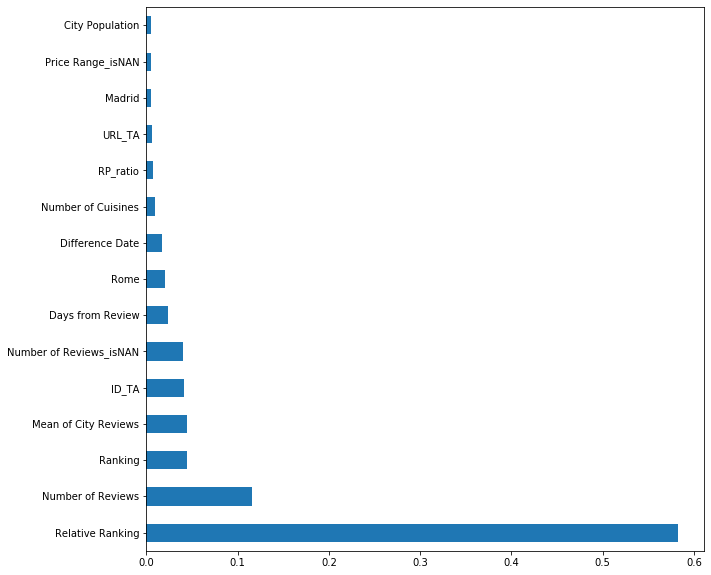

In [313]:
# в RandomForestRegressor есть возможность вывести самые важные признаки для модели
plt.rcParams['figure.figsize'] = (10,10)
feat_importances = pd.Series(model.feature_importances_, index=X.columns)
feat_importances.nlargest(15).plot(kind='barh')

# Submission
Если все устраевает - готовим Submission на кагл

In [314]:
test_data.sample(10)

,Ranking,Number of Reviews,URL_TA,ID_TA,Rating,Cuisine Style_isNAN,Price Range_isNAN,Number of Reviews_isNAN,Reviews_isNAN,Amsterdam,...,City Population,Number of Rests in City,RP_ratio,Number of Cuisines,Relative Ranking,Mean of City Reviews,Previous Date_isNAN,Last Date_isNAN,Difference Date,Days from Review
7812,4691.0,11.0,187791.0,10397641,0.0,1,1,0,0,0,...,2790712,2589,0.000928,1,1.811896,284.934265,1,1,123,1641
4701,5564.0,7.0,187791.0,8364509,0.0,0,1,0,0,0,...,2790712,2589,0.000928,2,2.149092,284.934265,1,1,123,1641
122,5919.0,58.0,186338.0,2006373,0.0,0,0,0,0,0,...,8961989,7193,0.000803,2,0.822883,137.170897,0,0,23,1412
2480,381.0,46.0,189852.0,9830919,0.0,0,0,0,0,0,...,975550,1033,0.001059,4,0.368829,79.061149,0,0,108,1406
8285,5281.0,3.0,187514.0,5795220,0.0,1,1,0,0,0,...,3334730,3813,0.001143,1,1.384999,101.444832,1,1,123,1641
6102,2293.0,42.0,187147.0,10494505,0.0,0,0,0,0,0,...,2148327,6108,0.002843,1,0.375409,117.394911,0,0,379,1402
8275,889.0,70.0,189158.0,4699212,0.0,0,0,0,0,0,...,506654,1647,0.003251,5,0.539769,127.603705,0,0,0,1373
797,14456.0,4.0,186338.0,6499017,0.0,0,1,0,0,0,...,8961989,7193,0.000803,1,2.009732,137.170897,0,0,197,1846
3551,10385.0,17.0,187147.0,7885568,0.0,0,1,0,0,0,...,2148327,6108,0.002843,2,1.700229,117.394911,1,1,123,1641
8020,3964.0,50.0,187147.0,2562402,0.0,0,0,0,0,0,...,2148327,6108,0.002843,4,0.648985,117.394911,0,0,121,1680


In [315]:
test_data = test_data.drop(['Rating'], axis=1)

In [316]:
sample_submission

,Restaurant_id,Rating
0,id_0,2.0
1,id_1,2.5
2,id_2,4.0
3,id_3,1.0
4,id_4,4.0
...,...,...
9995,id_9995,3.0
9996,id_9996,1.5
9997,id_9997,4.5
9998,id_9998,1.0


In [317]:
predict_submission = model.predict(test_data)

[Parallel(n_jobs=4)]: Using backend ThreadingBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done  42 tasks      | elapsed:    0.0s
[Parallel(n_jobs=4)]: Done 100 out of 100 | elapsed:    0.0s finished


In [318]:
predict_submission

array([3.145, 4.185, 4.45 , ..., 3.045, 4.51 , 4.33 ])

In [319]:
sample_submission['Rating'] = predict_submission
sample_submission.to_csv('submission.csv', index=False)
sample_submission.head(10)

,Restaurant_id,Rating
0,id_0,3.145
1,id_1,4.185
2,id_2,4.450
3,id_3,4.395
4,id_4,4.460
5,id_5,4.475
6,id_6,2.355
7,id_7,2.305
8,id_8,4.040
9,id_9,4.545


# What's next?
Или что делать, чтоб улучшить результат:
* Обработать оставшиеся признаки в понятный для машины формат
* Посмотреть, что еще можно извлечь из признаков
* Сгенерировать новые признаки
* Подгрузить дополнительные данные, например: по населению или благосостоянию городов
* Подобрать состав признаков

В общем, процесс творческий и весьма увлекательный! Удачи в соревновании!
